In [19]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

In [2]:
# Load the data
train_df = pd.read_csv(r'C:\Users\ayush\Downloads\RevisedHomesiteTrain1.csv')
test_df = pd.read_csv(r'C:\Users\ayush\Downloads\RevisedHomesiteTest1.csv')

In [3]:
# Exploring the Data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65000 entries, 0 to 64999
Columns: 596 entries, CoverageField11A to QuoteConversion_Flag
dtypes: float64(5), int64(591)
memory usage: 295.6 MB


In [4]:
train_df.describe()

,CoverageField11A,CoverageField11B,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,...,PropertyField38_N,PropertyField38_Y,GeographicField63_,GeographicField63_N,GeographicField63_Y,GeographicField64_CA,GeographicField64_IL,GeographicField64_NJ,GeographicField64_TX,QuoteConversion_Flag
count,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,...,65000.000000,65000.000000,65000.0,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000
mean,7.798892,12.954892,9.014585,12.995831,9.060000,13.017308,9.064538,13.017877,8.973785,13.011031,...,0.974969,0.020292,0.0,0.976262,0.023738,0.361862,0.120908,0.267631,0.249600,0.188646
std,5.304856,7.259023,5.586114,7.217093,5.568791,7.207118,5.588694,7.212825,5.564675,7.203325,...,0.156220,0.140999,0.0,0.152234,0.152234,0.480543,0.326022,0.442727,0.432785,0.391230
min,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,7.000000,5.000000,7.000000,5.000000,7.000000,5.000000,7.000000,5.000000,7.000000,...,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,13.000000,8.000000,13.000000,8.000000,13.000000,8.000000,13.000000,8.000000,13.000000,...,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,19.000000,12.000000,19.000000,12.000000,19.000000,12.000000,19.000000,12.000000,19.000000,...,1.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
train_df.isnull().sum()

CoverageField11A        0
CoverageField11B        0
CoverageField1A         0
CoverageField1B         0
CoverageField2A         0
                       ..
GeographicField64_CA    0
GeographicField64_IL    0
GeographicField64_NJ    0
GeographicField64_TX    0
QuoteConversion_Flag    0
Length: 596, dtype: int64

In [6]:
# Preprocessing
imputer = SimpleImputer(strategy='median')
train_df = pd.DataFrame(imputer.fit_transform(train_df), columns=train_df.columns)

In [7]:
# Splitting features and target
X = train_df.drop(columns=['QuoteConversion_Flag'])
y = train_df['QuoteConversion_Flag']

In [8]:
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)# Splitting features and target
X = train_df.drop(columns=['QuoteConversion_Flag'])
y = train_df['QuoteConversion_Flag']

In [9]:
# Train-Test Split
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [10]:
# Handling Imbalanced Data with SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [11]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    y_pred_proba = model.predict_proba(X_valid)[:, 1]
    accuracy = accuracy_score(y_valid, y_pred)
    roc_auc = roc_auc_score(y_valid, y_pred_proba)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print(classification_report(y_valid, y_pred))
    sns.heatmap(confusion_matrix(y_valid, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.show()

Multilayer Perceptron Performance:
Accuracy: 0.8930
ROC AUC Score: 0.9167
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93     10548
         1.0       0.74      0.66      0.70      2452

    accuracy                           0.89     13000
   macro avg       0.83      0.81      0.82     13000
weighted avg       0.89      0.89      0.89     13000



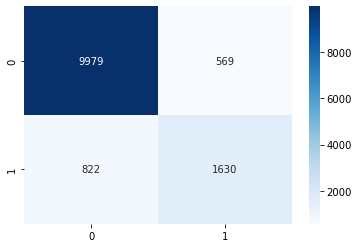

In [12]:
# 1. Multilayer Perceptron (MLP)
mlp = MLPClassifier(random_state=42, max_iter=300)
print("Multilayer Perceptron Performance:")
evaluate_model(mlp, X_train_smote, y_train_smote, X_valid, y_valid)


SVM Performance:


C:\Users\ayush\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.9045
ROC AUC Score: 0.9349
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94     10548
         1.0       0.78      0.68      0.73      2452

    accuracy                           0.90     13000
   macro avg       0.86      0.82      0.84     13000
weighted avg       0.90      0.90      0.90     13000



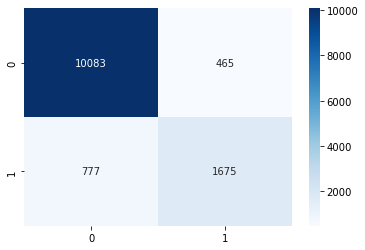

In [13]:
# 2. Support Vector Machine (SVM with Linear Kernel)
linear_svc = LinearSVC(random_state=42, max_iter=500)
calibrated_svc = CalibratedClassifierCV(linear_svc, method='sigmoid')

print("\nSVM Performance:")
evaluate_model(calibrated_svc, X_train_smote, y_train_smote, X_valid, y_valid)


Decision Tree Performance:
Accuracy: 0.8801
ROC AUC Score: 0.8087
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93     10548
         1.0       0.68      0.69      0.69      2452

    accuracy                           0.88     13000
   macro avg       0.80      0.81      0.81     13000
weighted avg       0.88      0.88      0.88     13000



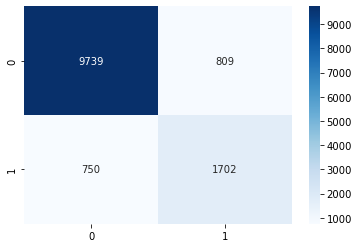

In [14]:
# 3. Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
print("\nDecision Tree Performance:")
evaluate_model(dt, X_train_smote, y_train_smote, X_valid, y_valid)


Random Forest Performance:
Accuracy: 0.9057
ROC AUC Score: 0.9465
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94     10548
         1.0       0.85      0.61      0.71      2452

    accuracy                           0.91     13000
   macro avg       0.88      0.79      0.83     13000
weighted avg       0.90      0.91      0.90     13000



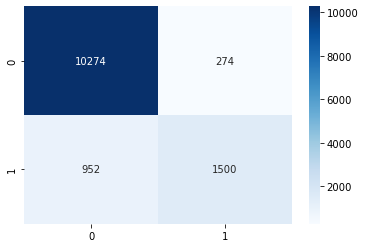

In [15]:
# 4. Random Forest Classifier
rf = RandomForestClassifier(random_state=42, n_estimators=100)
print("\nRandom Forest Performance:")
evaluate_model(rf, X_train_smote, y_train_smote, X_valid, y_valid)


K-Nearest Neighbors Performance:
Accuracy: 0.6592
ROC AUC Score: 0.7514
              precision    recall  f1-score   support

         0.0       0.91      0.64      0.75     10548
         1.0       0.32      0.74      0.45      2452

    accuracy                           0.66     13000
   macro avg       0.62      0.69      0.60     13000
weighted avg       0.80      0.66      0.70     13000



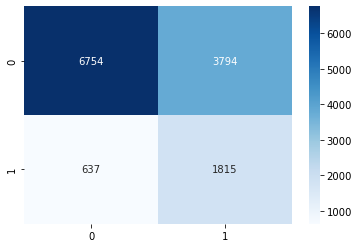

In [16]:
# 5. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
print("\nK-Nearest Neighbors Performance:")
evaluate_model(knn, X_train_smote, y_train_smote, X_valid, y_valid)



Stacking Model Performance:


C:\Users\ayush\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

Accuracy: 0.9097
ROC AUC Score: 0.9465
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95     10548
         1.0       0.82      0.67      0.74      2452

    accuracy                           0.91     13000
   macro avg       0.87      0.82      0.84     13000
weighted avg       0.91      0.91      0.91     13000



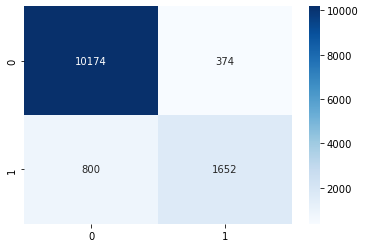

In [17]:
# Ensemble Learning - Stacking
estimators = [
    ('mlp', mlp),
    ('svm', calibrated_svc),
    ('dt', dt),
    ('rf', rf),
    ('knn', knn)
]

stacked_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
print("\nStacking Model Performance:")
evaluate_model(stacked_model, X_train_smote, y_train_smote, X_valid, y_valid)

C:\Users\ayush\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: Conve


Best Stacked Model Performance after RandomizedSearchCV:


C:\Users\ayush\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

Accuracy: 0.9096
ROC AUC Score: 0.9466
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95     10548
         1.0       0.81      0.67      0.74      2452

    accuracy                           0.91     13000
   macro avg       0.87      0.82      0.84     13000
weighted avg       0.91      0.91      0.91     13000



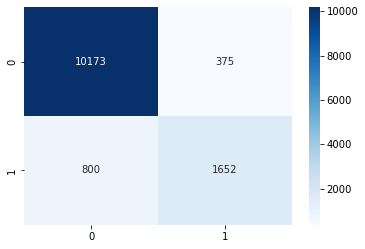

In [20]:
# Hyperparameter Tuning on Stacked Model
# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'final_estimator__C': np.logspace(-2, 1, 4),  # e.g., [0.01, 0.1, 1, 10]
    'final_estimator__max_iter': [100, 200]
}

# Using RandomizedSearchCV with fewer iterations
random_search = RandomizedSearchCV(
    stacked_model, param_dist, n_iter=10, cv=3, scoring='roc_auc', n_jobs=-1, random_state=42
)
random_search.fit(X_train_smote, y_train_smote)
best_model = random_search.best_estimator_

print("\nBest Stacked Model Performance after RandomizedSearchCV:")
evaluate_model(best_model, X_train_smote, y_train_smote, X_valid, y_valid)

In [22]:
# Generate Predictions for Submission
#test_features = imputer.transform(test_df)
#test_features_scaled = scaler.transform(test_features)
#test_predictions = best_model.predict_proba(test_features_scaled)[:, 1]

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Separating numeric and categorical features
numeric_cols = test_df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = test_df.select_dtypes(include=['object']).columns

# Creating imputers for numeric and categorical columns
numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Applying imputers
test_df[numeric_cols] = numeric_imputer.fit_transform(test_df[numeric_cols])
test_df[categorical_cols] = categorical_imputer.fit_transform(test_df[categorical_cols])

# Scaling numeric features
scaler = StandardScaler()
test_features_scaled = scaler.fit_transform(test_df[numeric_cols])

# Generating predictions
test_predictions = best_model.predict_proba(test_features_scaled)[:, 1]


In [23]:
# Create Submission File
submission = pd.DataFrame({'QuoteNumber': test_df['QuoteNumber'], 'QuoteConversion_Flag': test_predictions})
submission.to_csv('stacked_model_submission.csv', index=False)

print("Submission file created successfully!")

Submission file created successfully!
